### Navigation Reminder

- **Grey cells** are **code cells**. Click inside them and type to edit.
- **Run**  code cells by pressing $ \triangleright $  in the toolbar above, or press ``` shift + enter```.
-  **Stop** a running process by clicking &#9634; in the toolbar above.
- You can **add new cells** by clicking to the left of a cell and pressing ```A``` (for above), or ```B``` (for below). 
- **Delete cells** by pressing ```X```.
- Run all code cells that import objects (such as the one below) to ensure that you can follow exercises and examples.
- Feel free to edit and experiment - you will not corrupt the original files.

# 06B Putting it all together. Simple Text Analysis (Lessons 1-6)

In lessons 1-5, we learned about many of the building blocks that make Python a powerful language, including basic data types (strings, integers, floats, lists and dictionaries), conditional structures, and loops. 

In this notebook, we will run through a long-form exercise that allows us to put all this knowledge together. 

We will be working with a corpus of fairy tales by the brothers Grimm, counting the frequency of terms used in each individual story and then creating a simple algorithm that measures similarity between stories using this information. In the future, such algorithms can be imported from modules created by others; but creating one is a useful way to reinforce the knowledge you obtained in the past lessons, practice working through a small project and avoid getting into the habit of 'outsourcing' algorithms without thinking about our needs and objectives, as well as what these algorithms are doing.

There are several modules for text analysis that provide advanced tools for text analysis. In this lesson, however, we will use the basic building blocks of the Python language to construct simple tools for term counting and similarity analysis. 

In this notebook, we will go through five main phases:
1. Text pre-processing
1. Term Counting
1. Term Weighting
1. Calculating a similarity score
1. Visualizing results

Please note that there are multiple paths to the objectives we outline below. We do provide a 'solution' notebook with our approach towards this project as guidance if you get stuck, but if you find alternative solutions, it is more useful to think critically about your code and whether it achieves its goals than to try to make it conform to the sample solution.

---

**Lesson Objectives**
- Practice:
    - Using basic data structures (strings and numbers) and their operators
    - Using collections (lists and dictionaries), and discerning when to select one or the other
    - Creating loops
    - Using conditional statements
- Develop good habits for projects, including: 
    - Taking time to understand the source data and its particularities before committing to an approach
    - Thinking critically about algorithms and problem-solving, instead of immediately delegating to solutions developed by others
---

**1.** The file we will be using is saved in 'Other_files/GrimmsFairyTales.txt'.  Using the 'with xxx as file' notation, create a file handle using the open() statement and then read the file as one block of text, assigning it to the variable text. This ensures that the file is closed after we read into it. 

In [64]:
with open('Other_files/GrimmsFairyTales.txt','r',encoding='utf=8') as file:
    text = file.read()
# Text taken from http://www.gutenberg.org/files/5314/5314-0.txt

**2.** Take a first look at the text file by printing characters 5,000 to 10,000 of the text file.

**Hint:** the object is like a long string, so you can index into it like as you usually would a string.

In [ ]:
print(text[5000:10000])

**3.** It is also helpful to display the text without formatting, so we can see invisible characters such as those used for whitespace. Index into the whole text as before, but without using the print statement.

Start thinking about the **characteristics of the file**. How are the stories separated and structured?  How might we use whitespace to divide it into individual stories, and these stories into terms (also known as 'tokens')? What actions might we have to perform in order to extract these tokens for counting?

In [ ]:
text[5000:10000]

Here are some of the characteristics of the text that we see will affect our analysis.

    - As can be seen at the start of story 2 (Cat and Mouse in Partnership), each story starts with a title that starts with a number. The title is separated from the previous story by four instances of the newline character \n (one to end the final line of the poem, and two to generate blank lines after), and from the text of the story by two newline characters \n.
    - Words are separated by spaces or one or more instances the newline character \n (between the last word of a line and the first of the next).
    - Some words begin with a capital letter, others are fully lowercase.
    - Some words have punctuation around them.
    
We can use the first two characteristics to split the block of text into poems, and then tokens. The other characteristics will have to be edited out to get a clean count of the tokens (to ensure, for instance, that 'Now' and 'now' or 'now.' and 'now' are counted as the same token).

# 1. Text Pre-Processing

How we choose to clean a text depends on our project's goal. In this case, our desired output is a list of terms in each of our poems, which we will then count and compare in our analysis.

To end up with a set of clean tokens, we will have to pre-process the text in several phases:
1. Strip the text of punctuation and cases (capitalization).
1. Split the text into stories using four newline characters (\n\n\n\n).
1. Separate the title of the story from the main text with two newline characters (\n\n).
1. Split the text into tokens using whitespace.

Note that text cleaning could actually be undertaken at any point: we choose to do it first for the sake of efficiency, applying the changes to the whole text and avoiding creating loops that would otherwise have to re-iterate the step for each poem or for each token. 

## Removing Punctuation and Cases

In this case, we want to very simply count term frequency, so we make the decision to remove capitals and any punctuation outside of tokens. This way, words will be counted as the same term regardless of how they were capitalized or if they had any adjacent punctuation marks. 

In the code cell below, we are creating a string object that contains common punctuation marks. 

In [65]:
punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~’‘“”'

Recall that strings can be thought of as a series of characters, and a for-loop will iterate through each character in a string if used in the for-statement.

1. Using variable assignment and a string method, create a variable called 'text_clean' which is an all-lowercase version of the text variable.
2. Create a loop that iterates through the punctuation marks above and uses another string method to replace the marks from the clean_text with no character (this could be written as a string with nothing in between the quotes, or ''). Remember that string methods do not act in place, so you will have to reassign the clean_text variable within the loop.

In [66]:
text_clean = text.lower()
for mark in punctuation:
    text_clean = text_clean.replace(mark,'')

In [ ]:
print(text_clean[5000:10000])

## Splitting the Block of Text into Poems

Previously, we observed that the stories in the text are separated by four newline characters (\n). Use this information and a [string method](https://docs.python.org/2.5/lib/string-methods.html) to split the clean text into a list of stories, assigned to a variable called 'stories'.

In [67]:
stories = text_clean.split('\n\n\n\n')

How many stories do we have? Check the length of the list, which should be 201.

In [ ]:
len(stories)

Finally, retrieve and print an item from the list, to examine its contents:

In [ ]:
print(stories[0])

## Removing title from text

Each story begins with a title, which can be removed (we can later use the index to determine the title from the poem's position in the list). We can use the string.split() method with a maximum number of 1 splits to  separate the title and only store the text.
 
Create an empty list called stories2. Then create a loop that iterates through our stories and splits it by \n\n a maximum of one times (maxsplit=1). This method should output a two-item list for each story, one containing the title and one containing the text. Within the loop, append the second item of the outputted list into our stories2 list.

In [68]:
stories2 =[]
for story in stories:
    a = story.split('\n\n', maxsplit=1)
    text = a[1]
    stories2.append(text)

In [ ]:
stories2[0]

## Tokenization: Splitting each Story into a List of Terms

Thus far, we have transformed one long text file into a collection of story objects. To count the frequency of terms in each story, we have to split each story into a collection of terms or tokens. 

> Tokenization:  The process of breaking down text document apart into individual units of meaning, most frequently words.

One issue we noticed before is that some words are separated by spaces, but others might be separated by newline characters (\n). Since we don't care about story structure in this exercise, the simplest solution is to replace line break characters with spaces. This will allow us to use the string.split() method afterwards using spaces to divide the stories up into tokens.

Note that we didn't do this in the first text-preprocessing step, where we argued we should make these changes in a way that minimized the number of iterations necessary in our code. The reason is simple: up to this point, we needed line breaks to split the text into individual stories. Now, the newline characters have served their purpose, and we can remove them before splitting further.

In the code cell below, create an empty list called poems_clean. Then build a loop that iterates through each item in our stories_dict, replaces all \n characters with spaces, and appends the modified poem to our stories_clean dict.

In [69]:
stories_clean = []
for story in stories2:
    stories_clean.append(story.replace('\n',' '))

Next, create an empty list called stories_tokens. Then, construct a loop that uses a string method to split each cleaned poem by spaces, and appends the results to the poems_tokens list.

In [70]:
stories_tokens = []
for story in stories_clean:
    stories_tokens.append(story.split(' '))

Where we started with a list of poems, we further split each of those items into a list of terms. It is useful to thus bear in mind that stories_tokens is a list of lists. Each item in stories_tokens, indexable by position, is a list of the terms included in a particular story.  

In this situation, we can access a story by position, which has been preserved in the previous transformation from individual poem to list of tokens, is sufficient for our purposes. 

Let's examine one item from our new poems_tokens list. What it should contain is a list of each of the terms in our poem. 

In [ ]:
print(stories_tokens[0])

By now, we have the raw data in a format that allows us to begin our analysis. 

We will be creating a metric to evaluate similarity between documents. For this, we need to evaluate term frequencies, which we can do by counting terms within each document and dividing by the document's length. Once we have this information, we will evaluate document similarity by creating a formula that compares term frequencies in two documents. 

---
# 2. Solving the Problem: Calculating Term Frequencies

We should think about the nature of our problem. 

We have a data structure which is a list in which each item is a list of tokens. For each list of tokens, we will have to identify an individual term, and then count the number of times it appears in the list. Because texts vary in length, we should divide the count by the number of words in the text- the result of this operation is called the **term frequency**. 

In other words, we will have a number of **unique terms** and an associated frequency **value** for each. This should ring some alarm bells about the best data structure for storing the information. What data structure would you use?

Ideally, we would want to create dictionaries of word counts. In each dictionary, each term would be a key, and its count would be the value. There would be one dictionary per story. 

## Calculating Term Frequencies: A loop for one story

What we have to design now is a loop that can generate the count for each word. We can work it out for one poem, before creating a more general loop that works through the 201 stories.

First, assign the first poem in our list to the variable 'poem1'. Remember that in a list, the first position is 0. We will use this poem to think about how to work through an individual case before generalizing and applying the method to other poems.

In [73]:
story1 =stories_tokens[0]

In [ ]:
print(story1)

Within our problem, we have to think of two scenarios:

For each word in our poem,
1. If we are encountering a new word, that is, if the word is not in our data structure, create an item where the key is the token, and the value is 1. 
2. If the word already has an item in our data structure, retrieve the value and update it by adding 1 to the count.

Finally, we have to divide each final count by the number of words in the text.

Remember how to access, create and modify information in a dictionary. To retrieve a value from a dictionary, you call the dictionary name and the key in brackets. This method also works to create a new dictionary item, or to update an item's value. Also remember that you can iterate through the keys in a dictionary as you would iterate through the items in a list.


Now, write some code that:
1. Creates an empty dictionary called term_counts
2. Loops through the terms in story 1 and populates the term_counts dictionary with unique terms and the number of times each one appears in the poem. Within the dictionary, each item will be comprised of a key (the token) and a value (the count). Take into account the two situations that could emerge, as described above.

In [74]:
term_counts={}
for token in story1:
    if token not in term_counts:
        term_counts[token]=1
    else:
        term_counts[token]=term_counts[token]+1

In [107]:
term_counts

{'in': 4,
 'the': 10,
 'winter': 1,
 'time': 1,
 'when': 2,
 'deep': 1,
 'snow': 2,
 'lay': 1,
 'on': 2,
 'ground': 3,
 'a': 5,
 'poor': 1,
 'boy': 1,
 'was': 6,
 'forced': 1,
 'to': 4,
 'go': 2,
 'out': 1,
 'sledge': 1,
 'fetch': 1,
 'wood': 1,
 'he': 13,
 'had': 1,
 'gathered': 1,
 'it': 8,
 'together': 1,
 'and': 9,
 'packed': 1,
 'wished': 1,
 'as': 2,
 'so': 3,
 'frozen': 1,
 'with': 1,
 'cold': 1,
 'not': 1,
 'home': 1,
 'at': 2,
 'once': 2,
 'but': 4,
 'light': 1,
 'fire': 1,
 'warm': 1,
 'himself': 1,
 'little': 2,
 'scraped': 1,
 'away': 1,
 'thus': 1,
 'clearing': 1,
 'found': 2,
 'tiny': 1,
 'gold': 1,
 'key': 4,
 'hereupon': 1,
 'thought': 2,
 'that': 4,
 'where': 1,
 'lock': 1,
 'must': 2,
 'be': 1,
 'also': 1,
 'dug': 1,
 'an': 1,
 'iron': 1,
 'chest': 1,
 'if': 1,
 'does': 1,
 'fit': 1,
 'no': 2,
 'doubt': 1,
 'there': 2,
 'are': 1,
 'precious': 1,
 'things': 2,
 'box': 2,
 'searched': 1,
 'keyhole': 1,
 'last': 1,
 'discovered': 1,
 'one': 1,
 'small': 1,
 'hardly': 1,


The dictionary above holds the absolute count of terms in story1, but recall that we want the relative frequency of terms. You can calculate this by dividing each count by the length of the story.

In [75]:
length = len(story1)
term_freqs={}
for token in term_counts:
    term_freqs[token]= term_counts[token]/length

In [105]:
term_freqs

{'in': 0.014757554462403373,
 'old': 0.0021082220660576245,
 'time': 0.0021082220660576245,
 'when': 0.011243851018973999,
 'wishing': 0.0007027406886858749,
 'still': 0.0007027406886858749,
 'helped': 0.0021082220660576245,
 'one': 0.0028109627547434997,
 'there': 0.004216444132115249,
 'lived': 0.0007027406886858749,
 'a': 0.019676739283204497,
 'king': 0.011946591707659873,
 'whose': 0.0007027406886858749,
 'daughter': 0.0035137034434293743,
 'were': 0.0035137034434293743,
 'all': 0.0028109627547434997,
 'beautiful': 0.0021082220660576245,
 'but': 0.014054813773717497,
 'the': 0.05692199578355587,
 'youngest': 0.0028109627547434997,
 'wa': 0.022487702037947997,
 'so': 0.007730147575544624,
 'that': 0.007027406886858749,
 'sun': 0.0014054813773717498,
 'itself': 0.0007027406886858749,
 'which': 0.007027406886858749,
 'ha': 0.0014054813773717498,
 'seen': 0.0014054813773717498,
 'much': 0.0007027406886858749,
 'astonished': 0.0007027406886858749,
 'whenever': 0.0007027406886858749,
 '

## Term Frequencies: Extending the loop to all our stories

The loop above works well for one story, but we have 201 stories to analyze. 

That means we have to create 201 dictionaries, and store them in a way that is easy to retrieve. Once again, because all we are using is position of the story to identify it, a list (which maintains and is indexable by position) is the best data structure for this case. 

Create an empty list called stories_freqs.  Then, construct a nested for-loop. First, the loop should iterate through each item in our stories_tokens_lemma list.  Within the loop, for each list of poem tokens, the loop should generate a dictionary of word counts. In other words, the loops you created above can be modified and nested into the new loop to work on all our poems.

In [94]:
stories_freqs = []

for story in stories_tokens:
    term_counts={}
    length=len(story)
    for token in story:
        if token not in term_counts:
            term_counts[token]=1
        else:
            term_counts[token]=term_counts[token]+1
    term_freq={}
    for term in term_counts:
        term_freq[term]=term_counts[term]/length
    stories_freqs.append(term_freq)

In [106]:
print(stories_freqs)

{'in': 0.014757554462403373, 'old': 0.0021082220660576245, 'times': 0.0007027406886858749, 'when': 0.011243851018973999, 'wishing': 0.0007027406886858749, 'still': 0.0007027406886858749, 'helped': 0.0021082220660576245, 'one': 0.0028109627547434997, 'there': 0.004216444132115249, 'lived': 0.0007027406886858749, 'a': 0.014054813773717497, 'king': 0.004919184820801124, 'whose': 0.0007027406886858749, 'daughters': 0.0007027406886858749, 'were': 0.0035137034434293743, 'all': 0.0028109627547434997, 'beautiful': 0.0021082220660576245, 'but': 0.014054813773717497, 'the': 0.05692199578355587, 'youngest': 0.0028109627547434997, 'was': 0.022487702037947997, 'so': 0.007730147575544624, 'that': 0.007027406886858749, 'sun': 0.0014054813773717498, 'itself': 0.0007027406886858749, 'which': 0.007027406886858749, 'has': 0.0014054813773717498, 'seen': 0.0014054813773717498, 'much': 0.0007027406886858749, 'astonished': 0.0007027406886858749, 'whenever': 0.0007027406886858749, 'it': 0.018271257905832748, 

---
# A simple Algorithm for Document Similarity

In the code above, we cleaned the text, split it into tokens, and calculated the term frequencies for all poems. Next, we can use the term frequencies to calculate the similarity between pairs of stories.

We can use a simple measure of distance for this purpose. 

>**Euclidean distance** is the straight-line distance between two points in space.

We could think of each document as a point whose location in space is determined by its token frequencies. To simplify the issue, if we had two tokens x and y, their counts would correspond to the point's (x,y) locations in a two-dimensional space. If we had two documents, with (x,y) values (1,2) and 2,3) respectively, for instance, their distance is defined by this formula: 

$$\sqrt{(x1-x2)^2+(y1-y2)^2}$$ 

Conceptually, we are adding the distance in x and the distance in y, where taking the square ensures that we get no errors from negative differences. This formula can be extended through any number of dimensions by adding the square difference for as many terms as necessary. With n tokens, we are thinking of the documents as being positioned in an n-dimensional space, and will have n square differences in our formula.

To refine the analysis a bit further, we will also give these terms different weights. While term frequency alone can be informative, many words with little inherent meaning (words such as 'the' or 'and') will be over-represented in the documents. Longer documents will disproportionately have such words, and thus appear to be more similar to other long documents based on length alone, not content.

One way to account for this issue is Term Frequency-Inverse Document Frequency  (TF-IDF), which controls for this issue by assigning lower weights to tokens that are frequent throughout many texts.

Our approach will thus have two parts:

1. Calculate the IDF score for all terms in all our poems
2. Measure document similarity through euclidean distance of each documents in TF-IDF scores.

# Text Frequency - Inverse Document Frequency

The TF-IDF score is very simply the term frequency, which we already calculated, multiplied by a weight that gives a higher value to terms that are infrequent in the documents of the corpus. So, in our measure, common words such as "the" or "and", which increase with story length, will not contribute too much to text similarity. Less common words will have a higher ponderation. 

The [IDF](https://en.wikipedia.org/wiki/Tf–idf) is a weight that is calculated by dividing the total number of documents by the number of documents that contain a word (and then transforming it using a logarithm). It can be thought of as a measure of the informativeness of a token. 

We can calculate the IDF scores for all the terms in our stories. Once we have them, we can include them in our distance measure by multiplying distances by this factor to gauge similarity. 

Create an empty dictionary called tf_idfs. Then, set up a loop that loops through all the stories in our stories_freqs list. For each term in a story, if the term is not in tf_idfs, create an item with the token as the key and value 1. If the term is in tf_idfs, add 1 to the value. This loop should calculate the number of stories the term appears in, storing the data in a dictionary.

Then, create a new loop that iterates through each term in tf_idfs and replaces the value with the logarithm of 201 (the total number of stories) divided by the number of stories the term appears in. You can use np.log() to take the logarithm of the division, which should look like: np.log(201/tf_idfs[term])

In [ ]:
import numpy as np

In [95]:
tf_idfs = {}

for story in stories_freqs:
    for token in story:
        if token not in tf_idfs:
            tf_idfs[token]=1
        else:
            tf_idfs[token]=tf_idfs[token]+1

N_stories= len(stories)

for token in tf_idfs:
    tf_idfs[token]=np.log(N_stories/tf_idfs[token])

In [78]:
tf_idfs

{'in': 0.015037877364540502,
 'old': 0.5497147169527111,
 'time': 0.15581043124562277,
 'when': 0.061557892999433365,
 'wishing': 2.905409635260705,
 'still': 0.3980301296206463,
 'helped': 2.21226245470076,
 'one': 0.07755823434587444,
 'there': 0.08294908298075093,
 'lived': 0.8844643002624778,
 'a': 0.0,
 'king': 0.8146685383269359,
 'whose': 1.66571874833269,
 'daughter': 0.837396789404492,
 'were': 0.09929822098228047,
 'all': 0.11034805716886541,
 'beautiful': 0.8034952377288107,
 'but': 0.0458095360312942,
 'the': 0.004987541511038968,
 'youngest': 2.12525107771113,
 'wa': 0.020101179321087303,
 'so': 0.08294908298075093,
 'that': 0.025190248828558495,
 'sun': 1.3912819026309295,
 'itself': 1.6144254539451395,
 'which': 0.11591910221832073,
 'ha': 0.43577045760349337,
 'seen': 0.999239814854906,
 'much': 0.5075143624623347,
 'astonished': 1.971100397883872,
 'whenever': 2.2587824703356527,
 'it': 0.010000083334583399,
 'shone': 1.8375690052593492,
 'her': 0.26635230564544665,
 '

# Creating a similarity score between Two Stories

Once again, to figure out the general loop, it helps to compare two stories first. 

Save the first and second items of the stories_freqs list as story1 and story2, respectively. Remembering how indexing works in lists.

In [79]:
story1 =stories_freqs[0]

In [ ]:
story1

In [80]:
story2 =stories_freqs[1]

In [ ]:
story2

We will now create a simple algorithm for comparing how similar two sonnets are to one another. Using the TF-IDF score (term counts multiplied by IDF score), we will compare the number of times a token appears in both sonnets.  

As we did before with our first loop, we can start thinking of a solution by first looking at two poems.

## Euclidean Distance Loop (2 Poems)

Recall that the general formula we are going to use is 

$$\sqrt{(x1-x2)^2+(y1-y2)^2}$$

Where, for two documents 1 and 2,  x1 and x2 represent the frequencies for a term. We will be using the TF-IDF score, that is, the term frequency multipled by the IDF score for our token. 

That is, to compare two documents, we need:

1. For each term, to calculate the square difference by:
    1. Multiplying its term frequency in each document by the IDF to get the respective TF-IDF scores. 
    1. Take the difference of these values
    1. Square the result.
1. Add the square differences of all terms
1. Take the square root of the total sum.

Create a script that calculates the Euclidean distance. It helps to create a variable called diffsum with value 0, as well as a set of all the tokens in both your documents using set unions. Then, you can loop through all the tokens in the set, and update the diffsum value as you calculate the square difference for each token. 

In [81]:
diffsum=0
tokens = set(story1)|set(story2) # create a list of all tokens in both poems

for token in tokens:
    if token in story1:
        a=story1[token]*tf_idfs[token]
    else:
        a=0
    if token in story2:
        b= story2[token]*tf_idfs[token]
    else:
        b=0
    term = (a-b)**2
    termsum= termsum+term
    
euc_similarity = 1/(1+termsum**0.5)

In [82]:
euc_similarity

0.894935196479383

# Euclidean Distance - Comparing Poem 1 to all other poems

In [83]:
c0 = stories_freqs[0]
c0_sims = []

for c1 in stories_freqs:
    tokens = set(c0)|set(c1) # create a list of all tokens in both poems
    termsum=0
    for token in tokens:
        if token in c0:
            a=c0[token]*tf_idfs[token]
        else:
            a=0
        if token in c1:
            b= c1[token]*tf_idfs[token]
        else:
            b=0
        term = (a-b)**2
        termsum= termsum+term
    euc_similarity = 1/(1+termsum**0.5)
    c0_sims.append(round(euc_similarity,3))
print(c0_sims)

[1.0, 0.895, 0.916, 0.922, 0.906, 0.916, 0.897, 0.874, 0.922, 0.914, 0.921, 0.887, 0.926, 0.912, 0.899, 0.926, 0.925, 0.888, 0.9, 0.919, 0.911, 0.919, 0.894, 0.914, 0.915, 0.873, 0.901, 0.904, 0.924, 0.809, 0.927, 0.757, 0.922, 0.877, 0.903, 0.919, 0.917, 0.865, 0.918, 0.919, 0.856, 0.881, 0.86, 0.91, 0.915, 0.92, 0.91, 0.906, 0.925, 0.922, 0.884, 0.92, 0.915, 0.921, 0.905, 0.916, 0.928, 0.877, 0.876, 0.929, 0.909, 0.911, 0.908, 0.906, 0.922, 0.824, 0.912, 0.903, 0.89, 0.914, 0.927, 0.888, 0.89, 0.887, 0.875, 0.927, 0.894, 0.893, 0.871, 0.898, 0.889, 0.858, 0.916, 0.889, 0.927, 0.863, 0.925, 0.924, 0.917, 0.919, 0.925, 0.931, 0.928, 0.92, 0.867, 0.922, 0.926, 0.884, 0.918, 0.911, 0.92, 0.903, 0.866, 0.924, 0.868, 0.918, 0.925, 0.893, 0.891, 0.911, 0.927, 0.895, 0.928, 0.912, 0.901, 0.919, 0.882, 0.917, 0.887, 0.917, 0.927, 0.926, 0.92, 0.91, 0.912, 0.908, 0.926, 0.903, 0.923, 0.875, 0.769, 0.895, 0.922, 0.927, 0.92, 0.929, 0.913, 0.844, 0.822, 0.647, 0.901, 0.894, 0.891, 0.919, 0.885, 

In [ ]:
max(c0_sims)

In [84]:
min(c0_sims)

0.647

In [ ]:
# One reason we might want to store this info as a dictionary: 
# if we sort on value, we lose order and therefore reference to the original poem

In [ ]:
c0_sims.sort()

In [ ]:
c0_sims

# Comparing Overlapping Words in Two Most Similar Poems

In [ ]:
# Eric's Code
def overlap_terms(index_a, index_b):
    c_a = counts_nonstop_list[index_a]
    c_b = counts_nonstop_list[index_b]
    only_a = []
    only_b = []
    both_ab = []
    for term,count in c_a.items():
        if term in c_b:
            both_ab.append(((term,count),(term,c_b[term])))
        else:
            only_a.append((term,count))
    for term,count in c_b.items():
        if term not in c_a:
            only_b.append((term,count))
    # sorting overlapped terms by the sum of the frequencies
    both_sorted = sorted(both_ab, key=lambda x:x[0][1]+x[1][1], reverse=True)
    a_sorted = sorted(only_a, key=lambda x:x[1], reverse=True)
    b_sorted = sorted(only_b, key=lambda x:x[1], reverse=True)
    # Just returning the first 15 of each non-overlap list
    return [('a','b')] + both_sorted + [('a','b')] + list(zip(a_sorted,b_sorted))[:15]

In [ ]:
# Using Sets

overlap = set(stories_freqs[0].keys()) & set(stories_freqs[59].keys())
only_a = set(stories_freqs[0])-set(stories_freqs[59])
only_b = set(stories_freqs[59])-set(stories_freqs[0])

In [ ]:
for item in overlap:
    print(item, stories_freqs[0][item],stories_freqs[59][item])

In [ ]:
for item in only_a:
    print(item, stories_freqs[0][item])

In [ ]:
for item in only_b:
    print(item, stories_freqs[59][item])

# For all pairs

In [96]:
def similarity_matrix(all_counts):
    all_sims_list = []
    tokens = set()
    for c0 in all_counts:
        sims_list = []
        for tc in all_counts:
            tokens = set(tc)|set(c0)
            termsum = 0
            for token in tokens:
                if token in c0:
                    a=c0[token]*tf_idfs[token]
                else:
                    a=0
                if token in tc:
                    b= tc[token]*tf_idfs[token]
                else:
                    b=0
                term = (a-b)**2
                termsum =termsum+term
            euc_similarity = 1/(1+termsum**0.5)
            sims_list.append(euc_similarity)
        norm_sims_id_list = [round(xx,3) for xx in sims_list]
        all_sims_list.append(norm_sims_id_list)
    return all_sims_list

In [97]:
only_sims_list = similarity_matrix(stories_freqs)

In [87]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [98]:
sim_ns_array = np.array(only_sims_list)

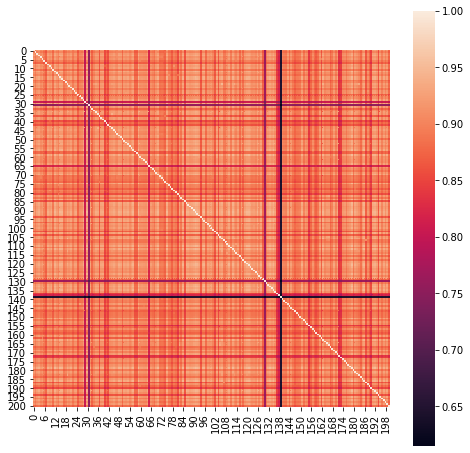

In [89]:
f, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(sim_ns_array, square=True)

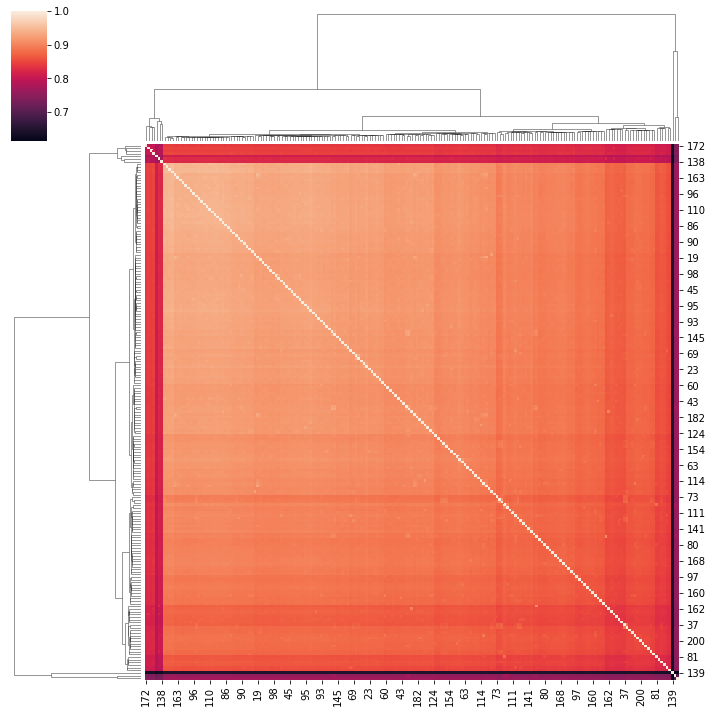

In [90]:
g = sns.clustermap(sim_ns_array)

In [103]:
print(stories[163])

163 the glass coffin

let no one ever say that a poor tailor cannot do great things and win
high honors all that is needed is that he should go to the right
smithy and what is of most consequence that he should have good luck
a civil adroit tailors apprentice once went out travelling and came
into a great forest and as he did not know the way he lost himself
night fell and nothing was left for him to do but to seek a bed in
this painful solitude he might certainly have found a good bed on the
soft moss but the fear of wild beasts let him have no rest there and
at last he was forced to make up his mind to spend the night in a tree
he sought out a high oak climbed up to the top of it and thanked god
that he had his goose with him for otherwise the wind which blew over
the top of the tree would have carried him away

after he had spent some hours in the darkness not without fear and
trembling he saw at a very short distance the glimmer of a light and
as he thought that a human habitation 

In [104]:
print(stories[96])

97 the water of life

there was once a king who had an illness and no one believed that he
would come out of it with his life he had three sons who were much
distressed about it and went down into the palacegarden and wept
there they met an old man who inquired as to the cause of their grief
they told him that their father was so ill that he would most certainly
die for nothing seemed to cure him then the old man said i know of
one more remedy and that is the water of life if he drinks of it he
will become well again but it is hard to find the eldest said i
will manage to find it and went to the sick king and begged to be
allowed to go forth in search of the water of life for that alone
could save him no said the king the danger of it is too great i
would rather die but he begged so long that the king consented the
prince thought in his heart if i bring the water then i shall be
best beloved of my father and shall inherit the kingdom so he set
out and when he had ridden forth a little 

In [91]:
print(stories[139])

140 domestic servants

whither goest thou to walpe i to walpe thou to walpe so so
together well go

hast thou a man what is his name cham my man cham thy man
cham i to walpe thou to walpe so so together well go hast thou
a child how is he styled wild my child wild thy child wild my
man cham thy man cham i to walpe thou to walpe so so together
well go hast thou a cradle how callest thou thy cradle
hippodadle my cradle hippodadle my child wild thy child wild my
man cham thy man cham i to walpe thou to walpe so so together
well go

hast thou also a drudge what name has thy drudge
fromthyworkdonotbudge my drudge fromthyworkdonotbudge
my child wild thy child wild my man cham thy man cham i to walpe
thou to walpe so so together well go


<div style="text-align:center">    
  <a href="06%20Loops.ipynb">Previous Lesson: Loops</a>|
   <a href="07%20Accessing%20Files.ipynb">Next Lesson: Accessing Files</a>
</div>